# Logistical Regression Classification Model - Medical No Shows
Use a Logistical Regression Classification model to predict the probability of showing up to a doctor's appointment. Find the correlation of a variety of attributes with being a noshow. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import os

### Load and view data

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset2.csv')
data.head()

,appointment_id,patient_id,repeat_patient_yn,male_yn,female_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,6.788140e+14,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,5.459370e+13,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4.369160e+12,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,5.452340e+13,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,6.291780e+13,1,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### Drop irrelevant columns

In [3]:
clean_data = data.drop(['appointment_id', 'patient_id'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (110521, 27)


### Assign X (data for modelling) and y (target)

In [4]:
X = clean_data.drop('no_show_yn', axis=1)
y = clean_data['no_show_yn']
print(X.shape, y.shape)

(110521, 26) (110521,)


### Split our data into training and testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### Create a Logistic Regression Model

In [6]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Fit (train) model using the training data

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Validate the model using the test data

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7981421160574255
Testing Data Score: 0.7980167203503311


### Make predictions

In [9]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.745022,0.254978
1,0,0,0.569632,0.430368
2,0,0,0.965402,0.034598
3,0,0,0.965093,0.034907
4,0,0,0.622840,0.377160
5,0,0,0.830324,0.169676
6,0,1,0.775533,0.224467
7,0,0,0.686414,0.313586
8,0,1,0.949894,0.050106
9,0,0,0.937155,0.062845


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[22045,     7],
       [ 5574,     5]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 22045   False Pos: 7
False Neg: 5574  True Pos: 5


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

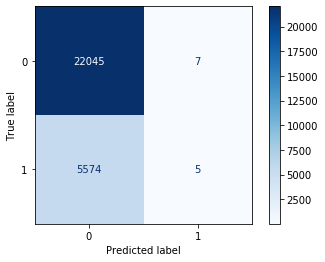

In [13]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')

### Find Coefficients of Attributes
Which attributes are most strongly correlated with being a noshow? The more positive the coefficient, the more likely of being a noshow, whereas the more negative the coefficient, the less likely to be a noshow.

In [14]:
attribute_coef = sorted(zip(classifier.coef_[0], X.columns), reverse=True)
attribute_coef

[(0.9734128936884808, 'advanced_appt_yn'),
 (0.5322957185459894, 'within_week_appt_yn'),
 (0.3302432512520669, 'saturday_yn'),
 (0.32165705919584753, 'alcoholism'),
 (0.2518096577070544, 'young_adult_yn'),
 (0.23774377692859164, 'welfare_assistance'),
 (0.18611839826407112, 'child_yn'),
 (0.1831677599842696, 'repeat_patient_yn'),
 (0.11848546955491762, 'handicap_yn'),
 (0.1121839219948981, 'diabetes'),
 (0.0830070961359798, 'neighborhood_income_lower_yn'),
 (0.05860044294272349, 'day_after_holiday_yn'),
 (0.02406821904720477, 'male_yn'),
 (-0.016264017293082106, 'neigborhood_income_higher_yn'),
 (-0.02635607018081873, 'tuesday_yn'),
 (-0.028496831374720574, 'female_yn'),
 (-0.03261505578940138, 'monday_yn'),
 (-0.033748757247099775, 'friday_yn'),
 (-0.0657823185169555, 'hypertension'),
 (-0.07117169117085091, 'neighborhood_income_middle_yn'),
 (-0.07180242148335238, 'adult_yn'),
 (-0.08632049417361085, 'wednesday_yn'),
 (-0.15563148618888042, 'thursday_yn'),
 (-0.22303903046953422, 'sm

In [15]:
LRattribute_coef_df = pd.DataFrame(attribute_coef, columns=['coefficients','attributes'])
LRattribute_coef_df = LRattribute_coef_df.sort_values(by='coefficients', ascending=False)
LRattribute_coef_df

,coefficients,attributes
0,0.973413,advanced_appt_yn
1,0.532296,within_week_appt_yn
2,0.330243,saturday_yn
3,0.321657,alcoholism
4,0.251810,young_adult_yn
5,0.237744,welfare_assistance
6,0.186118,child_yn
7,0.183168,repeat_patient_yn
8,0.118485,handicap_yn
9,0.112184,diabetes


In [16]:
#Export to csv 
LRattribute_coef_df.to_csv('../data/cleanData/modelResults/LRattribute_coef.csv', index = False, header=True)

### Rank Attribute Importance
Rank the attributes is most to least important

In [17]:
LRattribute_importance_df = LRattribute_coef_df.reindex(LRattribute_coef_df.coefficients.abs()
                                                        .sort_values(ascending=False).index)

LRattribute_importance_df

,coefficients,attributes
25,-1.510137,same_day_appt_yn
0,0.973413,advanced_appt_yn
1,0.532296,within_week_appt_yn
24,-0.370554,senior_yn
2,0.330243,saturday_yn
3,0.321657,alcoholism
4,0.251810,young_adult_yn
5,0.237744,welfare_assistance
23,-0.223039,sms_received
6,0.186118,child_yn
